In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from pprint import pprint

In [2]:
# Import data from CSV's
df = pd.read_csv('Resources/food_bev_data.csv')
df.head()

,Line,Consumption Category,2015M01,2015M02,2015M03,2015M04,2015M05,2015M06,2015M07,2015M08,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
0,70,Nondurable goods,2660549,2667298,2674394,2673472,2684923,2686891,2703838,2705901,...,3008558,3021381,3021272,3169119,2755262,2978595,3109915,3134189,3116286,3170807
1,71,Food and beverages purchased for off-premi...,879429,880382,884258,882702,883590,884369,886810,884787,...,987425,984969,981102,1201697,1028276,1050767,1043761,1058238,1045782,1049660
2,72,Food and nonalcoholic beverages purchase...,758255,758743,761143,760391,760844,760881,762501,760588,...,846297,843738,839913,1035444,879610,892912,885363,899938,886682,890498
3,73,Food purchased for off-premises consum...,670298,670911,672565,672575,672796,672519,673834,672420,...,747599,745573,741871,920039,783298,794315,786017,798231,786446,789583
4,74,Cereals and bakery products,131299,131481,130979,130627,130858,130910,131009,131314,...,142791,143562,143129,177724,150935,155017,153845,155114,153090,152942


In [3]:
#Making df just using the Meat & Fruit/Veggie rows & remove everything not 2020
food_df = df.loc[[df.index[7],df.index[18], df.index[19], df.index[20],df.index[21]]]
food_df.keys()
graph_df = food_df.drop(columns=["Line",'2015M01', '2015M02', '2015M03',
       '2015M04', '2015M05', '2015M06', '2015M07', '2015M08', '2015M09',
       '2015M10', '2015M11', '2015M12', '2016M01', '2016M02', '2016M03',
       '2016M04', '2016M05', '2016M06', '2016M07', '2016M08', '2016M09',
       '2016M10', '2016M11', '2016M12', '2017M01', '2017M02', '2017M03',
       '2017M04', '2017M05', '2017M06', '2017M07', '2017M08', '2017M09',
       '2017M10', '2017M11', '2017M12', '2018M01', '2018M02', '2018M03',
       '2018M04', '2018M05', '2018M06', '2018M07', '2018M08', '2018M09',
       '2018M10', '2018M11', '2018M12' ])
graph_df = graph_df.set_index("Consumption Category ")
graph_df



,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
Consumption Category,,,,,,,,,,,,,,,,,,,,,
Meats and poultry,162972,158595,161825,161893,161123,162745,164394,164896,163265,162487,...,160863,160228,159684,201253,170529,167545,162020,168507,168277,169222
Fresh fruits and vegetables,83285,81046,81457,82412,83093,84110,84757,84883,84974,84823,...,85618,85193,85144,106379,92262,93807,92650,92934,91172,91742
Fruit (fresh),37707,36950,37357,37728,38078,38440,38949,39226,39278,39021,...,39217,39759,39716,49421,42821,43849,43723,43801,42467,43055
Vegetables (fresh),45575,44097,44106,44689,45022,45675,45819,45675,45715,45814,...,46408,45473,45466,56995,49470,50004,49001,49203,48742,48744
Processed fruits and vegetables,30991,29927,30011,30430,30456,30551,30996,31034,30746,30591,...,30499,30639,30674,38355,32704,33378,32978,33136,32600,32502


In [4]:
print(graph_df.index)

Index(['          Meats and poultry', '          Fresh fruits and vegetables',
       '            Fruit (fresh)', '            Vegetables (fresh)',
       '          Processed fruits and vegetables'],
      dtype='object', name='Consumption Category ')


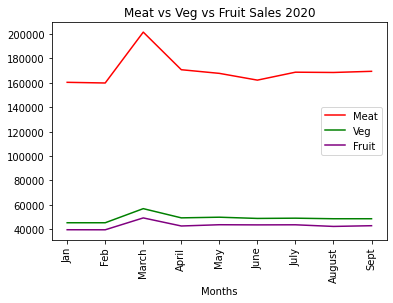

In [5]:
months = graph_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]

#graphing meat vs veg vs fruit
meats, = plt.plot(months, graph_df.loc['          Meats and poultry',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Meat")
veg, = plt.plot(months, graph_df.loc['            Vegetables (fresh)',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="green", label="Veg")
fruit, = plt.plot(months, graph_df.loc['            Fruit (fresh)',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="purple", label="Fruit")

# Create a legend for our chart
plt.legend(handles=[meats, veg,fruit], loc="best")
plt.title("Meat vs Veg vs Fruit Sales 2020")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()

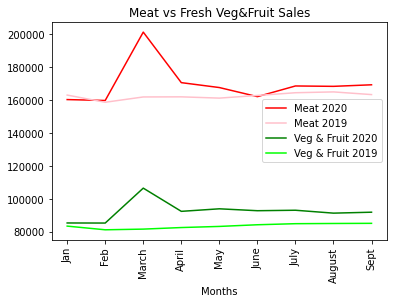

In [7]:
meats20, = plt.plot(months, graph_df.loc['          Meats and poultry',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Meat 2020")
vegfruit20, = plt.plot(months, graph_df.loc['          Fresh fruits and vegetables',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="green", label="Veg & Fruit 2020")

meats19, = plt.plot(months, graph_df.loc['          Meats and poultry',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="pink", label="Meat 2019")
vegfruit19, = plt.plot(months, graph_df.loc['          Fresh fruits and vegetables',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="lime", label="Veg & Fruit 2019")

# Create a legend for our chart
plt.legend(handles=[meats20,meats19, vegfruit20,vegfruit19], loc="best")
plt.title("Meat vs Fresh Veg&Fruit Sales")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()